<a href="https://colab.research.google.com/github/ektamistry/Denoising-Images-/blob/main/Denoising_Images_Using_Autoencoders_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, Input, Conv2DTranspose
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model

# Load


In [ ]:
image_train_dir = "/content/drive/MyDrive/ATML_CV/gaussian/data_ATML_CV/DIV2K_train_HR"
image_test_dir = "/content/drive/MyDrive/ATML_CV/gaussian/data_ATML_CV/DIV2K_test_HR"
image_val_dir = "/content/drive/MyDrive/ATML_CV/gaussian/data_ATML_CV/DIV2K_valid_HR"
image_list_train = []
image_list_test = []
image_list_val =[]

target_size = (256,256)

# for training dataset
for filename in os.listdir(image_train_dir):
  image_path = os.path.join(image_train_dir, filename)
  image = cv2.imread(image_path)
  image = cv2.resize(image, target_size)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = image.astype("float32") / 255.0
  image_list_train.append(image)
image_train = np.array(image_list_train)

# for training dataset
for filename in os.listdir(image_val_dir):
  image_path = os.path.join(image_val_dir, filename)
  image = cv2.imread(image_path)
  image = cv2.resize(image, target_size)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = image.astype("float32") / 255.0
  image_list_val.append(image)
image_val = np.array(image_list_val)

# for testing dataset
for filename in os.listdir(image_test_dir):
  image_path = os.path.join(image_test_dir, filename)
  image = cv2.imread(image_path)
  image = cv2.resize(image, target_size)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = image.astype("float32") / 255.0
  image_list_test.append(image)
image_test = np.array(image_list_test)

In [ ]:
print("Shape of image_train :" , image_train.shape)
print("Shape of image_val :" , image_val.shape)
print("Shape of image_test :" , image_test.shape)

Shape of image_train : (700, 256, 256, 3)
Shape of image_val : (100, 256, 256, 3)
Shape of image_test : (100, 256, 256, 3)


# Adding Gaussian Noise

In [ ]:
def gaussian(mean, std, image):
      noise = np.random.normal(mean, std, image.shape).astype(np.float32)
      noisy_image = cv2.add(image, noise)
      return(noisy_image)

In [ ]:
# adding Gaussian Noise
mean = 0.0
std = 0.25

noisy_train = []
noisy_test = []
noisy_val = []

# for train
for image in image_train:
    noisy_image = gaussian(mean, std, image)
    noisy_train.append(noisy_image)

# for val
for image in image_val:
    noisy_image = gaussian(mean, std, image)
    noisy_val.append(noisy_image)

# for test
for image in image_test:
    noisy_image = gaussian(mean, std, image)
    noisy_test.append(noisy_image)


In [ ]:
noisy_train = np.array(noisy_train)
image_train = np.array(image_train)
noisy_test = np.array(noisy_test)
image_test = np.array(image_test)
noisy_val = np.array(noisy_val)
image_val = np.array(image_val)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_images ( a, b ):
  n=3
  for i in range(3):
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(a[i])
      plt.axis('off')

      # Noisy image
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(b[i])
      plt.axis('off')

  # Adjust spacing between subplots
  plt.tight_layout()
  plt.show()
  #195075

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Conv2DTranspose
from tensorflow.keras.models import Model

# Define your input shape
input_shape = (256, 256, 3)
input_layer = Input(shape=input_shape)

# Encoder Layers
x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(512, (3, 3), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Decoder Layers
x = Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

# Output layer
output_layer = Conv2DTranspose(3, (3, 3), strides=(2, 2), padding='same', activation='sigmoid')(x)

generator = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the generator with msr
generator.compile(optimizer='adam', loss='mean_squared_error')
generator.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                             

In [ ]:
# x and y are same
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = generator.fit(noisy_train, image_train, epochs=50, batch_size=32, validation_data=(noisy_val, image_val), callbacks=[early_stopping])


Epoch 1/50
22/22 [==============================] - 281s 13s/step - loss: 0.0479 - val_loss: 0.1460
Epoch 2/50
22/22 [==============================] - 292s 13s/step - loss: 0.0222 - val_loss: 0.0947
Epoch 3/50
22/22 [==============================] - 288s 13s/step - loss: 0.0185 - val_loss: 0.0595
Epoch 4/50
22/22 [==============================] - 289s 13s/step - loss: 0.0171 - val_loss: 0.0450
Epoch 5/50
22/22 [==============================] - 290s 13s/step - loss: 0.0159 - val_loss: 0.0403
Epoch 6/50
22/22 [==============================] - 287s 13s/step - loss: 0.0151 - val_loss: 0.0367
Epoch 7/50
22/22 [==============================] - 289s 13s/step - loss: 0.0146 - val_loss: 0.0336
Epoch 8/50
22/22 [==============================] - 282s 13s/step - loss: 0.0144 - val_loss: 0.0304
Epoch 9/50
22/22 [==============================] - 293s 14s/step - loss: 0.0142 - val_loss: 0.0256
Epoch 10/50
22/22 [==============================] - 288s 13s/step - loss: 0.0138 - val_loss: 0.0225

In [ ]:
predictions_noise = generator.predict(noisy_test)

4/4 [==============================] - 11s 2s/step


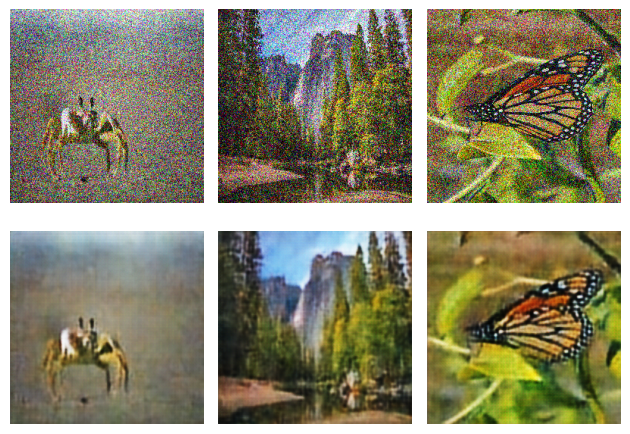

In [ ]:
plot_images(noisy_test, predictions_noise)

In [ ]:
import numpy as np

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100  # PSNR is infinity when mse is 0
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [ ]:
values = []

for i in range(0, 10):
    original = image_test[i]
    compressed = predictions_noise[i]
    value = PSNR(original, compressed)
    values.append(value)

avg_value = sum(values) / len(values)
print(f"Average PSNR value is {avg_value} dB")



Average PSNR value is 68.60546203016929 dB


In [ ]:
# Saving a Keras model
generator.save("/content/drive/MyDrive/ATML_CV/model_only_autoencoder_700")